# House Pricing Prediction
Hello, and welcome! In this notebook, we will be looking at house price prediction with Pandas. Our main aim is to build a model which can give us a good prediction on the price of a house based on other variables. We will use Linear Regression for this dataset and see if it gives us a good accuracy or not.

**_What is good accuracy?_** Well , it depends on what sort of data we are working with, for a credit risk data, an accuracy of 80% may not be good enough but for data using NLP, it would be good. So we can’t actually define “good accuracy” but anything above 85% will be considered satisfactory for us in this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

sns.set_theme()
%matplotlib inline

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


What can we infer from the above describe function?

- Look at the bedroom columns, the dataset has a house where the house has 33 bedrooms, seems to be a massive house and would be interesting to know more about it as we progress.
- Maximum square feet is 13,450 whereas the minimum is 290. we can see that the data is distributed.

We can infer a lot other things, but we will now use visualizations for some EDA.

### Question: Which is the most common house (Bedroom wise)?

Let’s see which is the most common bedroom number. You may wonder why this is important to know. 
Let’s look at this problem from a builder’s perspective... Sometimes, it is important for a builder to see which is the highest selling house type, this will influence the builder's decision on the kind of houses he should be building. For example, in Cameroon, for a good locality, a builder opts to make houses which have more than 1 bedroom. This attracts the higher middle class and upper class section of the society who are more likely to pay well for these houses.

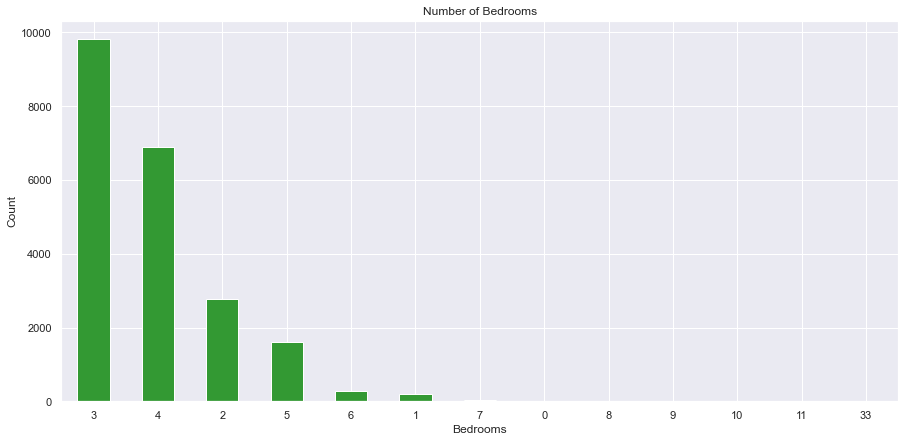

In [5]:
data['bedrooms'].value_counts().plot(kind='bar', figsize=(15,7), color='#339933')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

As we can see from the visualization, 3 bedroom houses are most commonly sold followed by 4 bedroom houses. So how is this info useful? For a builder having this data, He can make a new building with mostly 3 and 4 bedrooms to attract more buyers.

So now we know that 3 and 4 bedrooms are highest selling. But in which localities?

### Visualizing the location of the houses based on latitude and longitude.

We have data on the latitude and longitude for each house. We are going to see the common locations and how the houses are distributed.

<Figure size 720x720 with 0 Axes>

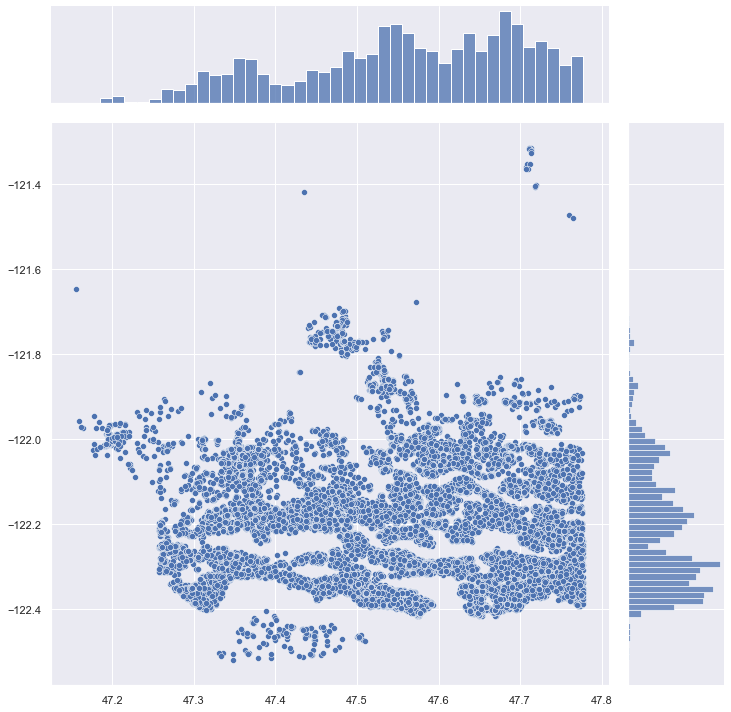

In [6]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

For some reason, the labels are not showing. However, the y-axis represents the lognitudes while the x-axis, the latitudes. 
The joinplot helps us see the concentration of houses and their placement. We can infer the following:
- For latitudes between -47.7 and -48.8, there is a large consistent concentration of houses, which would probably mean that it is an ideal location for constructing. 
- We can see that concentration for houses is high between longitudes -122.0 and -122.4. Which would mean that most of the buy’s have been for houses in this location.

## Question: How are common factors affecting the price of the houses?
We saw the common locations and now we’re going to see few common factors affecting the price of the houses and if so, by how much?

Text(0.5, 1.0, 'Price vs Square Feet')

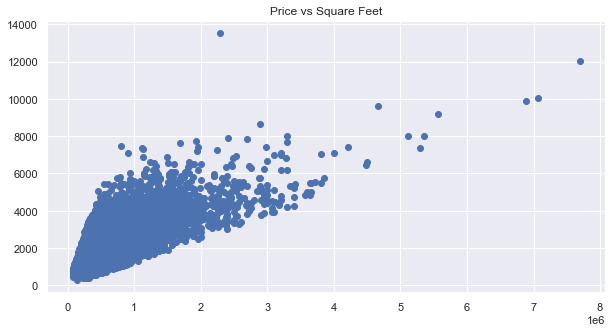

In [7]:
# Living Area

plt.figure(figsize=(10,5))
plt.scatter(data.price, data.sqft_living)
plt.title("Price vs Square Feet")

Text(0, 0.5, 'Longitude')

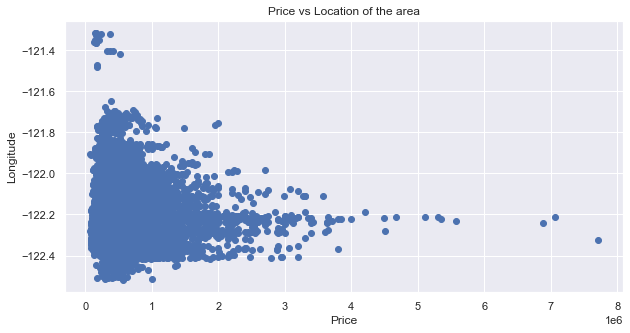

In [8]:
# Location of the House

plt.figure(figsize=(10,5))
plt.scatter(data.price, data.long)
plt.title("Price vs Location of the area")
plt.xlabel("Price")
plt.ylabel('Longitude')

The scatter plot helps us to see how our data points are scattered and are usually used for two variables. From the first figure we can see that the more the living area, the higher the price though the data is concentrated towards a particular price zone. We can, however, see from the figure that the data points seem to be in linear direction. Thanks to scatter plot we can also see some irregularities that some houses with very high square feet were sold for very less, maybe there is another factor affecting this or probably the data must be wrong. The second figure tells us about the location of the houses in terms of longitude and it gives us quite an interesting observation that -122.0 to -122.4 sells houses at much higher amount. 

We can see the correlation between the price and many other variables

Text(0.5, 1.0, 'Price vs Latitude')

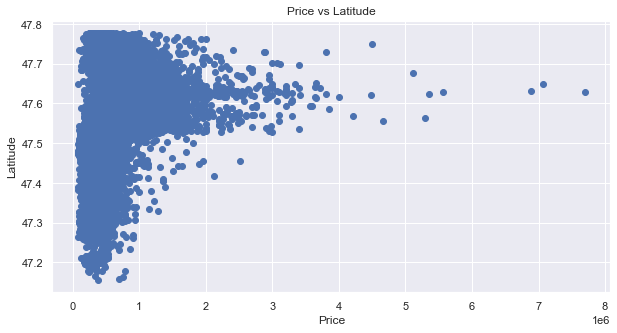

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(data.price, data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Price vs Latitude")

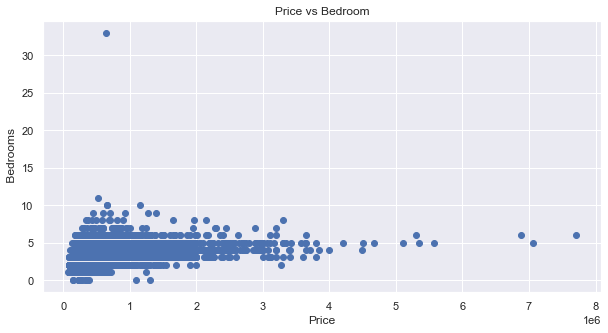

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(data.price, data.bedrooms)
plt.title("Price vs Bedroom")
plt.xlabel("Price")
plt.ylabel(" Bedrooms")
plt.show()

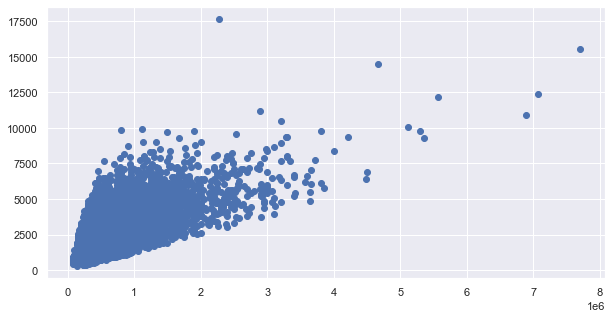

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(data['price'],(data['sqft_living']+data['sqft_basement']))

<AxesSubplot:>

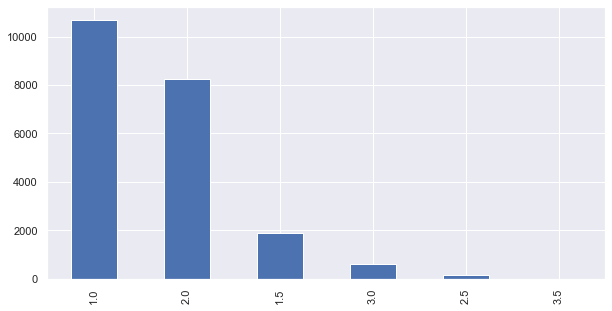

In [12]:
plt.figure(figsize=(10,5))
data.floors.value_counts().plot(kind='bar')

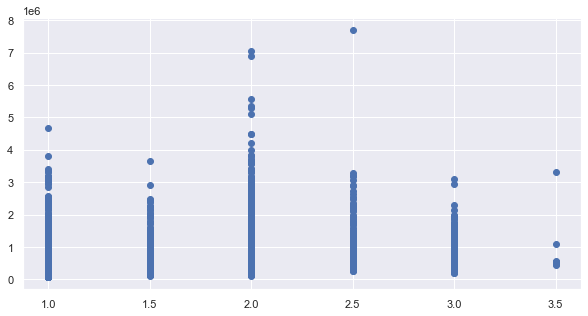

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(data.floors,data.price)

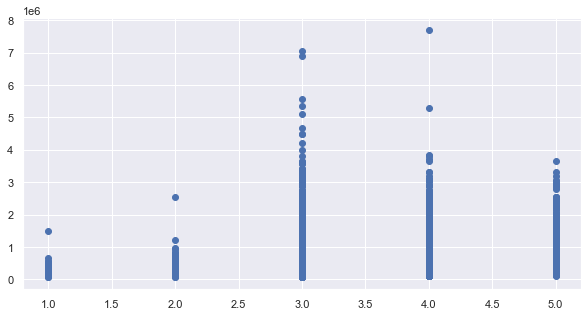

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the priciest location by zipcode?')

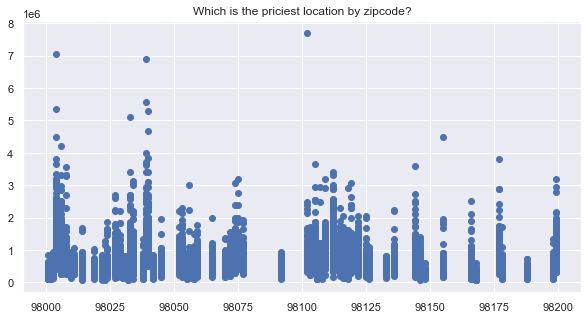

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(data.zipcode,data.price)
plt.title("Which is the priciest location by zipcode?")

As we can see from all the above visualizations, many factors affect the price of the houses.
Let us now create a model which would predict the price of the house based on the other factors such as square feet, location, etc. 

## Linear Regression

In easy words, Linear Regression is a model in statistics which helps us predict the future based on past relationship of variables. So, when we see a scatter plot having data points placed linearly we know regression can help to model such relationship.

Regression works on the line equation , y=mx+c , trend line is set through the data points to predict the outcome.

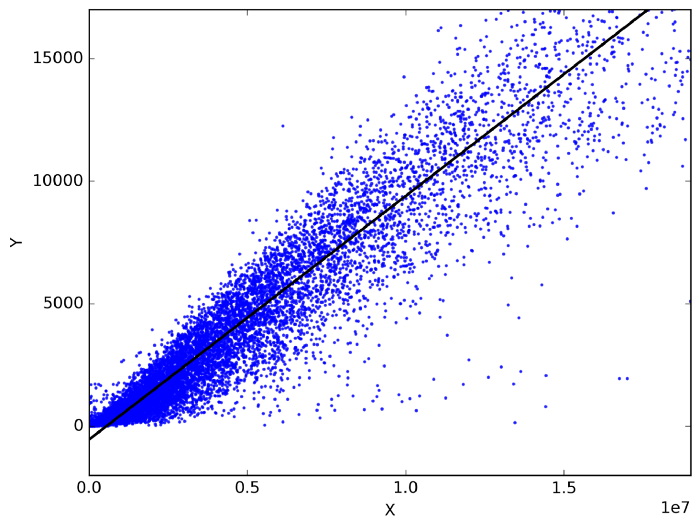

The variable we are predicting is called the criterion variable and is referred to as Y. The variable we are basing our predictions on is called the predictor variable and is referred to as X. When there is only one predictor variable, the prediction method is called Simple Regression. and if multiple predictor variable are present then multiple regression.

Let’s look at the code:

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [30]:
labels = data['price']
conv_dates = [1 if values == 2015 else 0 for values in data.date]
data['date'] = conv_dates
train_data = data.drop(['id', 'price'], axis=1)

In [31]:
train_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size = 0.10, random_state=2)

In [43]:
reg.fit(x_train, y_train)

LinearRegression()

In [44]:
reg.score(x_test, y_test)

0.7320342760357555

We use train data and test data, train data to train our machine and test data to see if it has learnt well or not. Before anything, it helps to look at it this way: _the machine is the student, train data is the syllabus, and test data is the exam_. We'll see how much the machine has scored, and if it scores well, our model is successful.

So what did we do? Let’s go step by step.

1. We import our dependencies, for linear regression we use sklearn (built in python library) and import linear regression from it.
2. We then initialize Linear Regression to a variable, **reg**.
3. We want to predict prices, hence, we set labels (output) as price columns and we also convert dates to 1’s and 0’s so that it doesn’t influence our data much. We use 0 for houses which are new that is built after 2015.
4. We import another dependency to split our data into train and test sets. I’ve made my train data as 90% and 10% of the data to be my test data, and randomized the splitting of data by using random_state.

So now, we have train data, test data, and labels for both. Let us fit our train and test data into a linear regression model.     After fitting our data to the model, we can check the score of our data. i.e. How well it can predict the house price. In this case, the prediction is 71%.

The accuracy of the model is lower than our aim of 85. So how do we achieve that 85% target?

We use a different method, which is very important for weak prediction models such as this. This might seem to be a bit advanced but if understood, is a really brilliant tool to enable better predictions.

For building a prediction model, many experts use **[gradient boosting regression](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)**. It is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Now to make it easy, remember how we mapped machine as a student, train data as the syllabus, and test data as the exam. Let’s try to understand gradient boosting method using the same. So, let’s analyse why our student (machine) didn’t get above 85%. There could be many reasons; few such reasons could be :-

- Our student forgot few of the topics before the exam, similarly data read by machine can be lost.
- It could be a weak learner who doesn’t learn by reading but needs visualization. Our machine can be a weak learner and may require decision trees.
- Even after using newer techniques, our student may not remember the syllabus so we give our student time to read and understand - Similar for the machine.

Hence for all these problems, there is one fix - **Gradient descent boosting**.

In [51]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')

In [52]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [53]:
print(clf.score(x_test, y_test)*100, '%')

91.88773555541627 %


Let's see what's happening:
- We first import the library from sklearn
- We create a variable where we define our gradient boosting regressor and set parameters to it:

_n_estimator — The number of boosting stages to perform. We should not set it too high which would overfit our model._

_max_depth — The depth of the tree node._

_learning_rate — Rate of learning the data._

_loss — loss function to be optimized. ‘squared_error’ refers to squared error regression_

_minimum sample split — Number of samples to be split for learning the data_

- We then fit our training data into the gradient boosting model and check for accuracy

- We got an accuracy of 91.88% which is amazing!

We can see that for weak predictions, gradient boosting does the trick for the same train and test data.

Check [this link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) for more about gradient boosting regressor.